In [27]:
import pandas as pd
import numpy as np
import sys, os, re
import matplotlib.pyplot as plt

from importlib import reload

if re.match(r'^(\w\:\\)|(/)', os.getcwd()):
    sys.path.insert(0, "c:/Users/dmitr/devs/quantl/")
    sys.path.insert(0, "c:/Users/dmitr/devs/Qube2exp/src/")
    # sys.path.insert(0, "c:/Users/dmitr/devs/Qube/")
    print('installed')

%load_ext cython

T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100_000)
data = list(zip(T, 1 + (2*np.random.randn(len(T))).cumsum()))

installed
The cython extension is already loaded. To reload it, use:
  %reload_ext cython


# Experiment 2

## Cython v2 tests (cseries1)

In [160]:
%load_ext autoreload
%autoreload 2

from qube.utils import reload_pyx_module

reload_pyx_module('../../src/qube/core/')
from qube.core.cseries1 import TimeSeries
del sys.modules['qube.core.cseries1']
from qube.core.cseries1 import (TimeSeries, Sma, time_to_str, Ema, recognize_time, time_to_str, time_delta_to_str)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
 > Reloaded ../../src/qube/core\cseries.pyx
 > Reloaded ../../src/qube/core\cseries1.pyx


### Testing

In [463]:
# %%timeit
ts = TimeSeries('test', '10Min')
ts.update(recognize_time('2024-01-01 00:00'), 1)
ts.update(recognize_time('2024-01-01 00:01'), 5)
ts.update(recognize_time('2024-01-01 00:06'), 2)
ts.update(recognize_time('2024-01-01 00:12'), 3)
ts.update(recognize_time('2024-01-01 00:21'), 4)
ts.update(recognize_time('2024-01-01 00:22'), 5)
ts.update(recognize_time('2024-01-01 00:31'), 6)
ts.update(recognize_time('2024-01-01 00:33'), 7)
ts.update(recognize_time('2024-01-01 00:45'), -12)
ts.update(recognize_time('2024-01-01 00:55'), 12)
ts.update(recognize_time('2024-01-01 01:00'), 12)
print(str(ts))

~~ UI ~~ TRUE 1.0  > ~~ UI ~~ TRUE 5.0  > ~~ UI ~~ TRUE 2.0  > ~~ UI ~~ FALSE 3.0 > ~~ UI ~~ FALSE 4.0 > ~~ UI ~~ TRUE 5.0  > ~~ UI ~~ FALSE 6.0 > ~~ UI ~~ TRUE 7.0  > ~~ UI ~~ FALSE -12.0 > ~~ UI ~~ FALSE 12.0 > ~~ UI ~~ FALSE 12.0 > test[10Min] | 7 records
  2024-01-01T01:00:00.000000000 12.0
  2024-01-01T00:50:00.000000000 12.0
  2024-01-01T00:40:00.000000000 -12.0
   .......... 
  2024-01-01T00:20:00.000000000 5.0
  2024-01-01T00:10:00.000000000 3.0
  2024-01-01T00:00:00.000000000 2.0



### <font color='orange'>WIP</font>

In [165]:
# %%timeit
ts = TimeSeries('close', '1h')
s1 = Sma(ts, 50)
e1 = Ema(ts, 50)
ss1 = Sma(s1, 50)
ee1 = Ema(e1, 50)
[ts.update(ti.asm8, vi) for ti, vi in data];

In [166]:
x0 = ts.to_series()
pe1 = x0.ewm(span=50, min_periods=50).mean()
pee1 = pe1.ewm(span=50, min_periods=50).mean()
ps1 = x0.rolling(50).mean()
pss1 = ps1.rolling(50).mean()

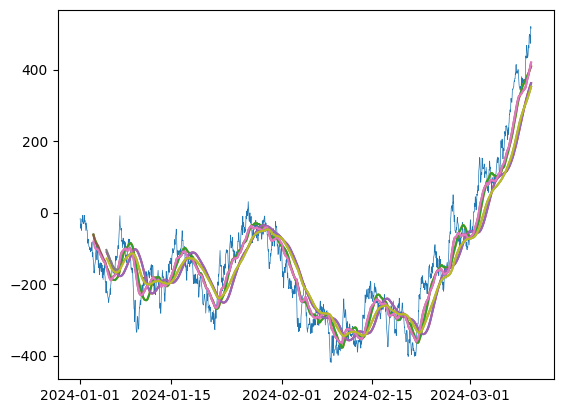

In [179]:
plt.plot(x0, lw=0.5)
plt.plot(s1.to_series()); plt.plot(ps1)
plt.plot(ss1.to_series()); plt.plot(pss1)
plt.plot(e1.to_series()); plt.plot(pe1)
plt.plot(ee1.to_series()); plt.plot(pee1)

In [ ]:
x1[:100]

In [126]:
ts0 = TimeSeries('close', '1Min')
em0 = Sma(ts0, 3)
em1 = Sma(em0, 3)

for t, v in [
    ('2024-01-01 00:00', 10),
    ('2024-01-01 00:00', 1),
    ('2024-01-01 00:01', 2),
    ('2024-01-01 00:01', 3),
    ('2024-01-01 00:01', 2),
    ('2024-01-01 00:02', 3),
    ('2024-01-01 00:03', 4),
    ('2024-01-01 00:04', 5),
    ('2024-01-01 00:04', 5.1),
    ('2024-01-01 00:04:20', 5),
    ('2024-01-01 00:05', 6),
    ('2024-01-01 00:05', 7),
    ('2024-01-01 00:05', 6),
    ('2024-01-01 00:07', 8),
    ('2024-01-01 00:07', -1),
    ('2024-01-01 00:07', 8),
    ('2024-01-01 00:08', 8),
    ('2024-01-01 00:09', 8),
    ('2024-01-01 00:10', 12),
    ('2024-01-01 00:11', 12),
    ('2024-01-01 00:12', 12),
    ('2024-01-01 00:13', 12),
    ('2024-01-01 00:14', 12),
]:
    ts0.update(recognize_time(t), v)

In [113]:
print(em1)

sma3[1Min] | 14 records
  2024-01-01T00:14:00.000000000 nan
  2024-01-01T00:13:00.000000000 nan
  2024-01-01T00:12:00.000000000 nan
   .......... 
  2024-01-01T00:02:00.000000000 nan
  2024-01-01T00:01:00.000000000 nan
  2024-01-01T00:00:00.000000000 nan



In [25]:
ts0.update(recognize_time('2024-01-01 00:11'), 3)

~~ UI ~~ FALSE 3.0 >  -> ret NAN |  [ 3.  3. nan nan nan]


1

## Tests of Cy module

In [ ]:
# %%timeit
ts = FloatSeries('test1', '5Min')
ts.update(Float(recognize_time('2024-01-01 00:00'), 1))
ts.update(Float(recognize_time('2024-01-01 00:06'), 2))
ts.update(Float(recognize_time('2024-01-01 00:12'), 3))
ts.update(Float(recognize_time('2024-01-01 00:21'), 4))
ts.update(Float(recognize_time('2024-01-01 00:22'), 5))
ts.update(Float(recognize_time('2024-01-01 00:31'), 6))
ts.update(Float(recognize_time('2024-01-01 00:33'), 7))
ts.update(Float(recognize_time('2024-01-01 00:45'), 12, 'test1'))
ts.update(Float(recognize_time('2024-01-01 00:55'), 12, 'test2'))
print(ts)

In [ ]:
ts[::-1]

In [ ]:
# %%timeit
# sma(pd.Series(dict(zip(t, range(len(t))))), 25)

In [33]:
T = pd.date_range('2024-01-01 00:00', freq='1Min', periods=100_000)
data = list(zip(T, 1 + (2*np.random.randn(len(T))).cumsum()))

In [44]:
%%timeit
s0 = Ema(100)
# s1 = Sma(100)
# s2 = Sma(50)
fs = FloatSeries('close', '1h').attach(s0)#.attach(s1).attach(s2)
[fs.update(Float(ti.asm8, vi)) for ti, vi in data];

363 ms ± 5.05 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
v0 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in fs})
ma0 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in s0.values})
ma1 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in s1.values})
ma2 = pd.Series({np.datetime64(v.time, 'ns'): v.v for v in s2.values})
plt.plot(v0)
plt.plot(ma0, ls='--')
plt.plot(ma1)
plt.plot(ma2)

In [ ]:
print(s1.values)